#### Lab 7

##### Use HMM for classification of your speech signal using STFT features.

In [6]:
# !pip install hmmlearn
# !pip install python_speech_features

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 124.5/124.5 kB 1.0 MB/s eta 0:00:00


In [17]:
#calling all dependencies
import numpy as np
from hmmlearn import hmm
from scipy.io import wavfile
from python_speech_features import mfcc, delta
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import librosa
#for mfcc features
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

#functions
def plotting(time,signal,sampling_rate,title,x_label,y_label):
    plt.figure(figsize=(10, 5))
    plt.plot(time,signal,color='purple')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [18]:

# Load audioSignal file
file_path = 'SP_shreya_audioFile.wav'
audioSignal, sampling_rate = librosa.load(file_path, sr=None, mono=True)
input_data = wav.read(file_path)


print('\nShape:', audioSignal.shape)
print('Datatype:', audioSignal.dtype)
print('Duration:', librosa.get_duration(y=audioSignal, sr=sampling_rate), 'seconds')



Shape: (122880,)
Datatype: float32
Duration: 2.786394557823129 seconds


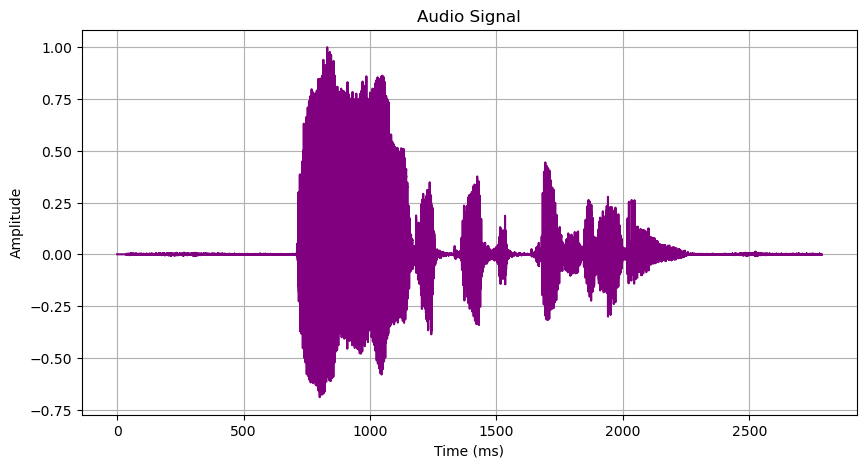

In [19]:
# Normalizing the audioSignal data
audioSignal /= np.max(np.abs(audioSignal))  # Normalizing to the range [-1, 1]

# Plotting
time_ms = np.arange(0, len(audioSignal)) / float(sampling_rate) * 1000
plotting(time_ms,audioSignal,sampling_rate,'Audio Signal','Time (ms)','Amplitude')

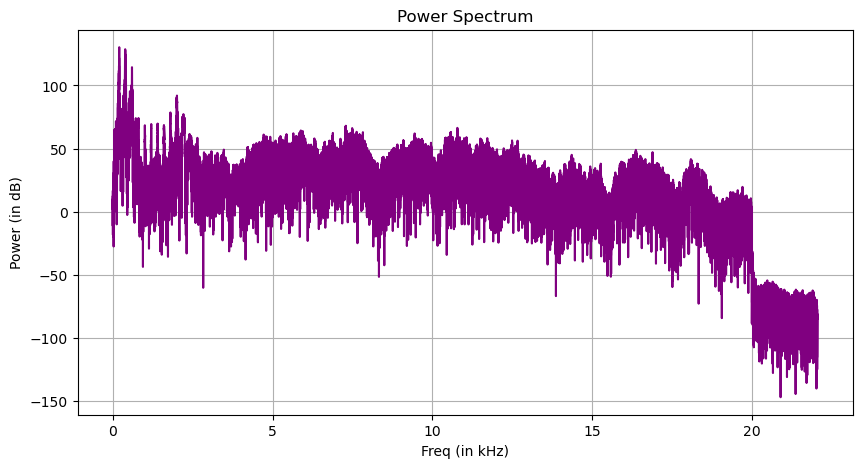

In [20]:

#tranforming the audioSignal from time domain to frequency domain to extract mfcc feature coefficients
transformed_signal = np.fft.fft(audioSignal)

half_length = np.ceil((len(audioSignal) + 1) / 2.0)
half_length=int(half_length)
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal **= 2

#power spectrum plot for the frequency domain audioSignal signal
power = 20 * np.log10(transformed_signal)
x_values = np.arange(0, half_length, 1) * ((sampling_rate / len(audioSignal)) / 1000.0)
#plotting
plotting(x_values, power, sampling_rate,'Power Spectrum','Freq (in kHz)','Power (in dB)')


[[-6.09332261 -5.15788947 -4.99137322 -5.44124283 -4.57722789 -3.48156717
  -2.71420343 -2.36500286 -1.71867033 -1.4810692  -0.56652425  0.40602778
   0.13575092  0.50107076  1.12918133  0.54458267  1.4953382   1.86165962
   2.60919384  2.7757891   2.87840434  3.1131941   3.60559069  3.92052727
   3.23704551  3.20367607]
 [ 0.67182733  3.09165321  2.49643813  1.89006748  2.78581032  1.64093328
   2.43256564  2.98574028  3.82303525  4.10155962  3.90776956  2.94367106
   2.5461061   3.0101408   3.71329454  5.05359569  5.29671606  5.51805312
   6.00274046  5.24657681  5.23974753  6.76881313  7.54704673  7.80560371
   8.47706154  7.45287698]]


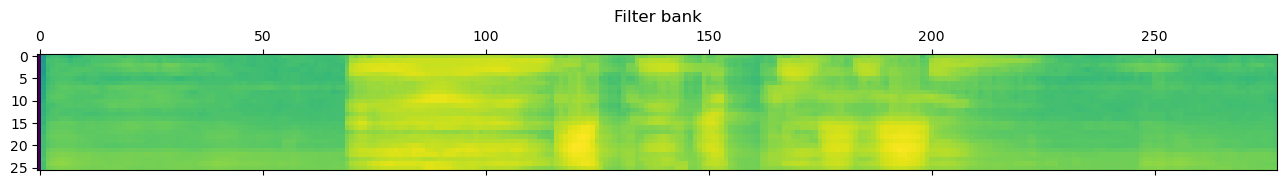

(278, 26)

In [21]:

#obtaining mfcc features
#Read in the audioSignal file
(rate,sig) = wav.read(file_path)

# Calculate the mfcc features based on the file data
mfcc_feat = mfcc(sig, rate, nfft=1200)

# Calculate the filterbank from the audioSignal file
fbank_feat = logfbank(sig, rate, nfft=1200)

#Print the result
print(fbank_feat[1:3, :])
#spectrogram
filterbank_features = fbank_feat.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()
fbank_feat.shape

In [22]:

#training using hmm
# Class to handle all HMM related processing
class HMMTrainer(object):

    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []

        if self.model_name == 'GaussianHMM':
            self.model = hmm.GaussianHMM(n_components=self.n_components,
                    covariance_type=self.cov_type, n_iter=self.n_iter)
        else:
            raise TypeError('Invalid model type')

    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))
    # Model running on input data to get score
    def get_score(self, input_data):
        print('score',self.model.score(input_data))
        return self.model.score(input_data)
